In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('../../data/fanfic_regression_data_merged_chs.tsv', sep = '\t')

In [3]:
len(df_all)

406336

In [4]:
df_all['Topic_novelty'].head()

0    0.196381
1    0.245605
2    0.391960
3    0.103724
4    0.260273
Name: Topic_novelty, dtype: float64

In [5]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)
term_ave = np.average(df_all['Term_novelty'])
topic_ave = np.average(df_all['Topic_novelty'])
df_all['term_x_topic'] = df_all['Term_novelty'] * df_all['Topic_novelty']
df_all['Term_novelty_cent'] = df_all['Term_novelty'] - term_ave
df_all['Topic_novelty_cent'] = df_all['Topic_novelty'] - topic_ave
df_all['Term_novelty_squared'] = np.square(df_all['Term_novelty_cent'])
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty_cent'])

In [6]:
df_all['term_x_topic'].head()

0    0.118429
1    0.111189
2    0.196910
3    0.038161
4    0.112204
Name: term_x_topic, dtype: float64

In [7]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [8]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL', 'Term_novelty', 'Entropy', 'Dist', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       '

In [9]:
# df_all = df_all[['Chapters', 'Words','Freq_relationship', 'Category_F_F', 'Category_F_M',
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
#        'ArchiveWarnings_underage',
#        'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
#        'ArchiveWarnings_violence',
#        'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
#        'Rating_N', 'Rating_T',
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [10]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

In [11]:
# df_t = df_all[df_all['Fandom_marvel'] == 1]

### Logistic

In [12]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL', 'Term_novelty', 'Entropy', 'Dist', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       '

In [13]:
def run_logit(df, field, sq_option):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    if sq_option:
        logit_model = sm.Logit(df['binary'], df[['Chapters',\
             'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared', 'term_x_topic',\
            'Freq_relationship', 'Chapters', 'Category_F_F', 'Category_F_M',\
           'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
           'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
           'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
           'ArchiveWarnings_violence',\
           'author_fic_cnt', 'Rating_G',\
           'Rating_M', 'Rating_N', 'Rating_T', \
           'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
           'Fandom_arthurian', 'Fandom_supernatural',
           'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
           'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
           'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
           'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
           'Fandom_ms_paint_adventures', 'Fandom_marvel',
           'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
            'Intercept']]).fit(method='bfgs')
    else:
        logit_model = sm.Logit(df['binary'], df[['Chapters',\
         'Term_novelty', 'Topic_novelty','term_x_topic',\
        'Freq_relationship', 'Chapters', 'Category_F_F', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [14]:
def run_ols(df, field, sq_option):
    df = run_logit(df, field, sq_option=sq_option)
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    if sq_option:
        model = ols( field + " ~ Chapters + Freq_relationship + author_fic_cnt + \
        Term_novelty +  Term_novelty_squared +  Topic_novelty +  Topic_novelty_squared + term_x_topic\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    else:
        model = ols( field + " ~ \
        Term_novelty +  Topic_novelty +  term_x_topic + \
     + Chapters + Freq_relationship + author_fic_cnt\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
     Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
     + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
     + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
     Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
     Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [15]:
def run_all():
    global kudos_model_sq_True, kudos_coef_sq_True, kudos_err_sq_True, hits_model_sq_True, hits_coef_sq_True, hits_err_sq_True
    global comments_model_sq_True,comments_coef_sq_True, comments_err_sq_True, bookmarks_model_sq_True, bookmarks_coef_sq_True, bookmarks_err_sq_True
    global ylabels_sq_True

    global kudos_model_sq_False, kudos_coef_sq_False, kudos_err_sq_False, hits_model_sq_False, hits_coef_sq_False, hits_err_sq_False
    global comments_model_sq_False,comments_coef_sq_False, comments_err_sq_False, bookmarks_model_sq_False, bookmarks_coef_sq_False, bookmarks_err_sq_False
    global ylabels_sq_False
    
    kudos_model_sq_True = run_ols(df_all, 'Kudos', sq_option=True)
    kudos_coef_sq_True = np.asarray(list(kudos_model_sq_True.params)[1:-1])
    kudos_err_sq_True = list(kudos_model_sq_True.bse)[1:-1]
    hits_model_sq_True = run_ols(df_all, 'Hits', sq_option=True)
    hits_coef_sq_True = list(hits_model_sq_True.params)[1:-1]
    hits_err_sq_True = list(hits_model_sq_True.bse)[1:-1]
    comments_model_sq_True = run_ols(df_all, 'Comments', sq_option=True)
    comments_coef_sq_True = list(comments_model_sq_True.params)[1:-1]
    comments_err_sq_True = list(comments_model_sq_True.bse)[1:-1]
    bookmarks_model_sq_True = run_ols(df_all, 'Bookmarks', sq_option=True)
    bookmarks_coef_sq_True = list(bookmarks_model_sq_True.params)[1:-1]
    bookmarks_err_sq_True = list(bookmarks_model_sq_True.bse)[1:-1]
    
    kudos_model_sq_False = run_ols(df_all, 'Kudos', sq_option=False)
    kudos_coef_sq_False = np.asarray(list(kudos_model_sq_False.params)[1:-1])
    kudos_err_sq_False = list(kudos_model_sq_False.bse)[1:-1]
    hits_model_sq_False = run_ols(df_all, 'Hits', sq_option=False)
    hits_coef_sq_False = list(hits_model_sq_False.params)[1:-1]
    hits_err_sq_False = list(hits_model_sq_False.bse)[1:-1]
    comments_model_sq_False = run_ols(df_all, 'Comments', sq_option=False)
    comments_coef_sq_False = list(comments_model_sq_False.params)[1:-1]
    comments_err_sq_False = list(comments_model_sq_False.bse)[1:-1]
    bookmarks_model_sq_False = run_ols(df_all, 'Bookmarks', sq_option=False)
    bookmarks_coef_sq_False = list(bookmarks_model_sq_False.params)[1:-1]
    bookmarks_err_sq_False = list(bookmarks_model_sq_False.bse)[1:-1]
    

In [16]:
run_all()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.037717
         Iterations: 35
         Function evaluations: 58
         Gradient evaluations: 54


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

         Current function value: 0.101466
         Iterations: 35
         Function evaluations: 55
         Gradient evaluations: 51


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

         Current function value: 0.506506
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fro

         Current function value: 0.395467
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fro

         Current function value: 0.037806
         Iterations: 35
         Function evaluations: 68
         Gradient evaluations: 64


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

         Current function value: 0.101452
         Iterations: 35
         Function evaluations: 54
         Gradient evaluations: 50


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

         Current function value: 0.506511
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fro

         Current function value: 0.395456
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [17]:
bookmarks_model_sq_True.bic

864331.6970402328

In [18]:
kudos_coef_sq_False

array([-1.07993407e+00, -1.26424721e+00,  9.95673909e-01,  1.92142478e-02,
        2.64830161e-01, -6.32000822e-06, -3.50202254e-02, -9.48761693e-02,
       -1.92495049e-01,  1.07131299e-01, -6.94752749e-02, -1.14050112e-01,
        1.04819663e-01, -4.97575236e-01, -2.01382607e-01, -1.67888402e-01,
       -4.36848313e-02, -5.28013504e-03,  5.50566089e-01,  1.88491712e-01,
        9.18949213e-02, -3.50728458e-01,  2.45807764e-02, -7.80990893e-01,
        2.06462170e-02, -4.05361013e-01, -5.75231343e-01, -2.74381929e-01,
       -6.32560056e-01, -4.70852406e-01, -3.51959581e-01, -1.25192208e+00,
       -3.32471786e-01, -5.24861763e-01, -1.86376399e-01, -9.42649351e-01,
       -9.63407013e-01, -4.32389014e-01, -4.36830075e-01,  1.53968338e-01,
       -1.05204357e+00, -4.36116960e-01, -3.82493054e-01])

In [19]:
def plot_ax(ax, title, coef, err, xlim_left, xlim_right, sq_option, ylabels, rsquared=0, xlabel='', \
            ylabel_flag=False, partial=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o')
    ax.set_yticks(range(len(ylabels)))
    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])
    ax.plot([0 for i in range(len(ylabels)+2)], range(-1,len(ylabels)+1), c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if sq_option:
        ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    else:
        ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if partial:
        ax.set_ylim(36.5,len(ylabels))
    else:
        ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    if partial:
        ax.text(0.57, 0.9, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    else:
        ax.text(0.5, 0.98, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    ax.set_title(title, fontsize=15)

In [20]:
def plot_fig(partial=False):
    if partial:
        fig, axes = plt.subplots(2,4,figsize = (15,11))
    else:
        fig, axes = plt.subplots(2,4,figsize = (15,34))
        
    ylabel_sq_True =['Term novelty', 'Term novelty squared', 'Topic novelty', 'Topic novelty squared', 'Term * Topic','Chapters', \
         'Frequent relationship',' Author work count',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    ylabel_sq_False =['Term novelty', 'Topic novelty','Term * Topic','Chapters', \
         'Frequent relationship',' Author work count',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
          'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
         ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
         ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
         Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
        Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]
    
    plot_ax(ax=axes[0][0], title='', ylabels=ylabel_sq_False, sq_option=False, coef=kudos_coef_sq_False, err=kudos_err_sq_False, xlim_left=min(kudos_coef_sq_False)-1, xlim_right=max(kudos_coef_sq_False)+1, rsquared=kudos_model_sq_False.rsquared.round(3), partial=partial, ylabel_flag=True, xlabel='')
    plot_ax(ax=axes[0][1],title='', ylabels=ylabel_sq_False, sq_option=False, coef=hits_coef_sq_False, err=hits_err_sq_False, xlim_left=min(hits_coef_sq_False)-1, xlim_right=max(hits_coef_sq_False)+1, rsquared=hits_model_sq_False.rsquared.round(3), partial=partial, xlabel='')
    plot_ax(ax=axes[0][2], title='', ylabels=ylabel_sq_False, sq_option=False, coef=comments_coef_sq_False, err=comments_err_sq_False, partial=partial, xlim_left=min(comments_coef_sq_False)-1, xlim_right=max(comments_coef_sq_False)+1, rsquared=comments_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][3], title='',ylabels=ylabel_sq_False, sq_option=False, coef=bookmarks_coef_sq_False, err=bookmarks_err_sq_False, partial=partial,xlim_left=min(bookmarks_coef_sq_False)-1, xlim_right=max(bookmarks_coef_sq_False)+1, rsquared=bookmarks_model_sq_False.rsquared.round(3), xlabel='')
   
    plot_ax(ax=axes[1][0], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_coef_sq_True, err=kudos_err_sq_True, xlim_left=min(kudos_coef_sq_True)-1, xlim_right=max(kudos_coef_sq_True)+1, rsquared=kudos_model_sq_True.rsquared.round(3), xlabel='Kudos', partial=partial, ylabel_flag=True)
    plot_ax(ax=axes[1][1], title='',ylabels=ylabel_sq_True, sq_option=True, coef=hits_coef_sq_True, err=hits_err_sq_True, xlabel='Hits', xlim_left=min(hits_coef_sq_True)-1, xlim_right=max(hits_coef_sq_True)+1, rsquared=hits_model_sq_True.rsquared.round(3), partial=partial)
    plot_ax(ax=axes[1][2], title='', ylabels=ylabel_sq_True, sq_option=True, coef=comments_coef_sq_True, err=comments_err_sq_True, partial=partial, xlim_left=min(comments_coef_sq_True)-1, xlim_right=max(comments_coef_sq_True)+1, rsquared=comments_model_sq_True.rsquared.round(3), xlabel='Comments')
    plot_ax(ax=axes[1][3], title='',ylabels=ylabel_sq_True, sq_option=True, coef=bookmarks_coef_sq_True, err=bookmarks_err_sq_True, partial=partial,xlim_left=min(bookmarks_coef_sq_True)-1, xlim_right=max(bookmarks_coef_sq_True)+1, rsquared=bookmarks_model_sq_True.rsquared.round(3), xlabel='Bookmarks')
    
#     plt.figtext(0.5, 0.99, 'Models 1-4', fontsize=25)
#     plt.figtext(0.5, 0.49, 'Models 5-8', fontsize=25)

    if partial:
        plt.figtext(0.13, 0.93, 'a', fontsize=25)
        plt.figtext(0.13, 0.5, 'b', fontsize=25)
    else:
        plt.figtext(0.13, 0.98, 'a', fontsize=25)
        plt.figtext(0.13, 0.49, 'b', fontsize=25)

    plt.tight_layout()
#     plt.savefig('ols_coefs_partial={}_merged.pdf'.format(partial), format='pdf')

In [21]:
# plot_fig(partial=True)

In [22]:
# plot_fig(partial=False)


In [23]:
from mpl_toolkits import mplot3d

In [24]:
kudos_model_sq_True.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Kudos   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     1759.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:57:23   Log-Likelihood:            -3.8367e+05
No. Observations:              276557   AIC:                         7.674e+05
Df Residuals:                  276510   BIC:                         7.679e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.2919      0.511     -8.404      0.000      -5.293      -3.291
Chapters                       0.0200      0.000     87.602      0.000       0.020       0.020
Freq_relationship              0.2811      0.005     53.335      0.000       0.271       0.291
author_fic_cnt             -5.253e-06   2.88e-06     -1.826      0.068   -1.09e-05    3.85e-07
Term_novelty                  -0.7383      0.037    -20.105      0.000      -0.810      -0.666
Term_novelty_squared           1.8758      0.106     17.655      0.000       1.668       2.084
Topic_novelty                 -0.6618      0.055    -11.927      0.000      -0.771      -0.553
Topic_novelty_squared          0.7415      0.116      6.366      0.000       0.513       0.970
term_x_topic                  -0.5071      0.131     -3.857      0.000      -0.765      -0.249
Category_Gen                  -0.0314      0.006     -4.933      0.000      -0.044      -0.019
Category_F_F                  -0.1017      0.008    -12.552      0.000      -0.118      -0.086
Category_F_M                  -0.1858      0.005    -34.630      0.000      -0.196      -0.175
Category_M_M                   0.1389      0.008     16.803      0.000       0.123       0.155
Category_Multi                -0.0713      0.008     -8.788      0.000      -0.087      -0.055
Category_Other                -0.1158      0.014     -8.484      0.000      -0.143      -0.089
ArchiveWarnings_underage       0.1072      0.010     10.241      0.000       0.087       0.128
ArchiveWarnings_death         -0.4943      0.009    -54.965      0.000      -0.512      -0.477
ArchiveWarnings_violence      -0.1985      0.008    -24.979      0.000      -0.214      -0.183
ArchiveWarnings_choose_no     -0.1560      0.004    -36.842      0.000      -0.164      -0.148
ArchiveWarnings_noncon        -0.0413      0.011     -3.648      0.000      -0.063      -0.019
Rating_N                      -0.0145      0.009     -1.685      0.092      -0.031       0.002
Rating_E                       0.5405      0.006     85.640      0.000       0.528       0.553
Rating_M                       0.1839      0.006     28.331      0.000       0.171       0.197
Rating_T                       0.0902      0.006     16.339      0.000       0.079       0.101
Fandom_harry_potter           -0.3317      0.012    -27.480      0.000      -0.355      -0.308
Fandom_dcu                     0.0310      0.013      2.464      0.014       0.006       0.056
Fandom_doctor_who             -0.7707      0.015    -53.111      0.000      -0.799      -0.742
Fandom_star_wars               0.0267      0.015      1.837      0.066      -0.002       0.055
Fandom_arthurian              -0.3993      0.015    -27.374      0.000      -0.428      -0.371
Fandom_supernatural           -0.5685      

In [42]:
def get_pred(model):
    x = 'Term_novelty'
    x2 = 'Term_novelty_squared'
    y = 'Topic_novelty'
    y2 = 'Topic_novelty_squared'
    xy = 'term_x_topic'
    x_range = np.arange(df_all[x].min(), df_all[x].max(), 0.05)
    x2_range = np.arange(df_all[x2].min(), df_all[x2].max(), 0.05)
    y_range = np.arange(df_all[y].min(), df_all[y].max(), 0.05)
    y2_range = np.arange(df_all[y2].min(), df_all[y2].max(), 0.05)
    X, Y = np.meshgrid(x_range, y_range)
    param_dic = dict(model.params)
    Z = model.params[0] + X*param_dic[x] + X*X*param_dic[x2] + Y*param_dic[y] + Y*Y*param_dic[y2] + X*Y*param_dic[xy]
    return X,Y,Z

In [43]:
def plot_model(model, title):
    fig = plt.figure(figsize=plt.figaspect(1)*2)
    ax = plt.axes(projection='3d')
#     sample = df_all.sample(1000)
    # ax.scatter(sample[x].values, sample[y].values, np.log(sample['Kudos'].values), 
    #            marker='.', label="Raw")
    # cond = df[model.endog_names].values > results.fittedvalues.values
    # ax.scatter(df[x][cond].values, df[y][cond].values, df[model.endog_names]
    #            [cond].values, label="Raw")
    X,Y,Z = get_pred(model)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.4)
    # ax.scatter(df[x][cond == False].values, df[y][cond == False].values,
    #            df[model.endog_names][cond == False].values)
#     ax.legend()
    ax.set_xlabel('Term novelty')
    ax.set_ylabel('Topic novelty')
    ax.set_title(title)


<IPython.core.display.Javascript object>


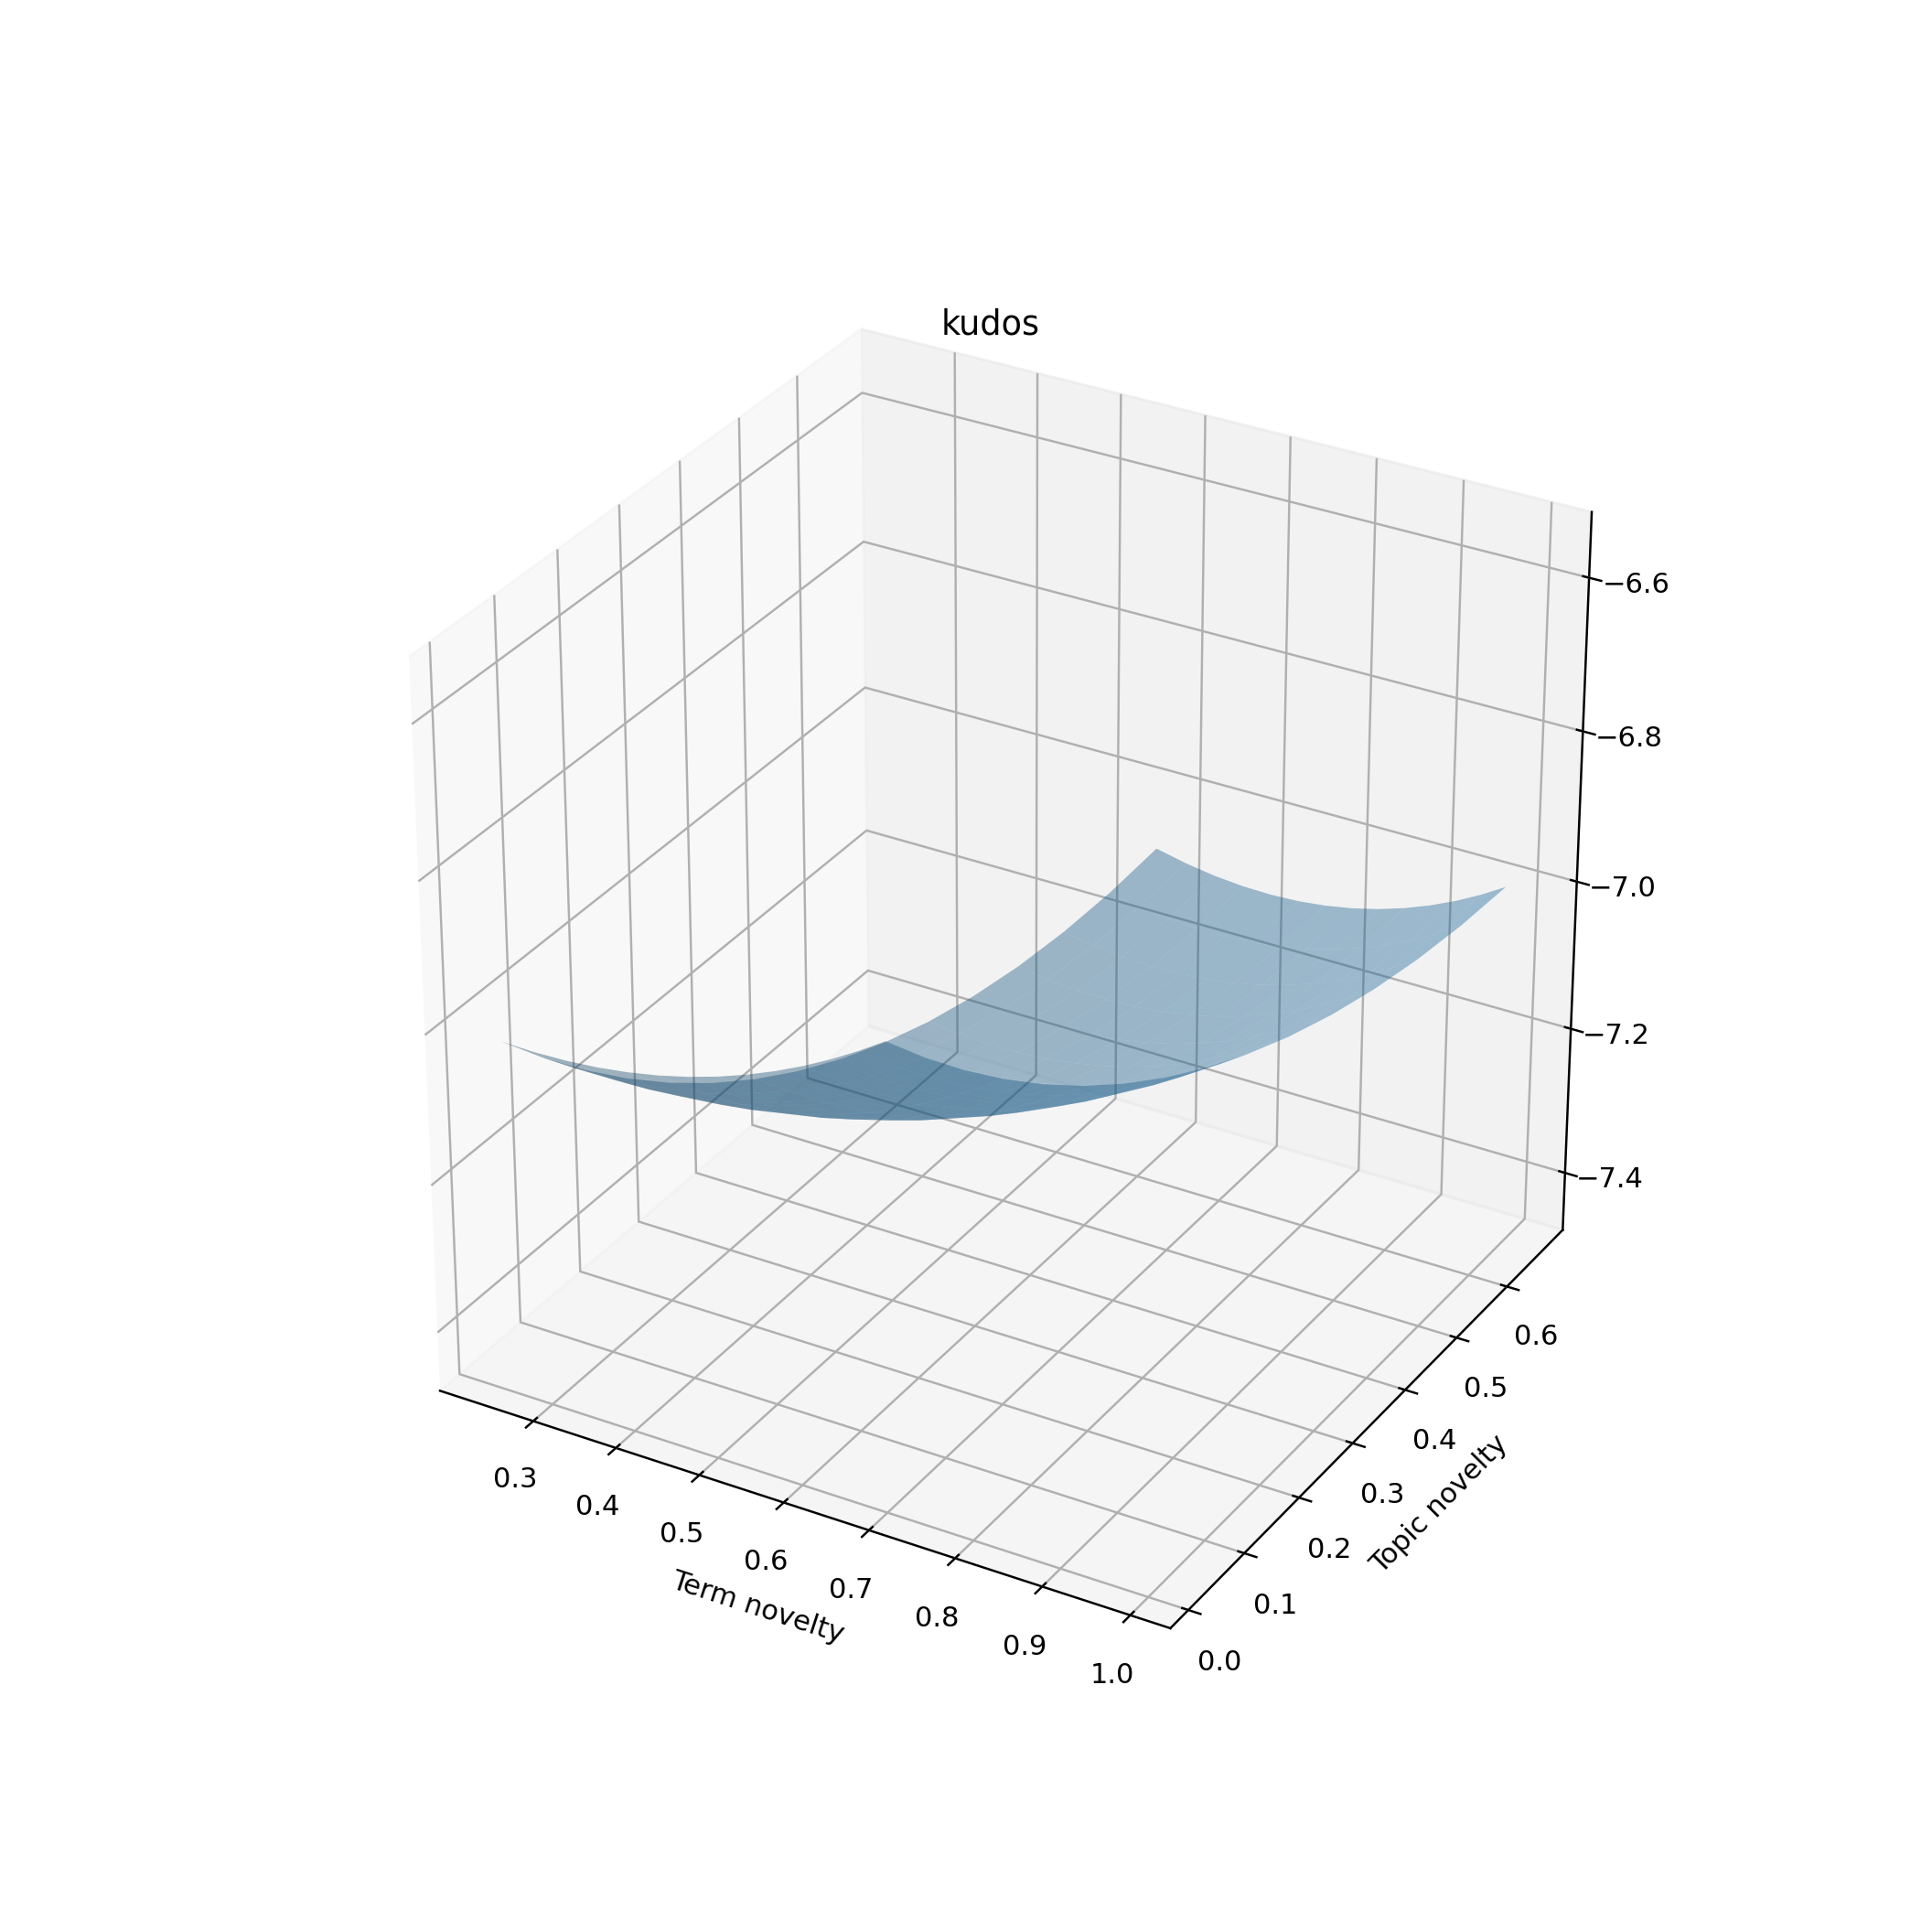

In [50]:
plot_model(kudos_model_sq_True, 'kudos')